In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# cleaned up dataset
df=pd.read_csv('IPPS_Data_Clean.csv',dtype={'provider_id':str,'provider_zip_code':str, 'drg_id':str})
df.head(3)

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,drg_id
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,039
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,039
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,039


In [4]:
print('Number of procedures:', df.drg_id.nunique())
print(' Number of providers:', df.provider_id.nunique())
print('Number of discharges:', df.total_discharges.sum())

Number of procedures: 100
 Number of providers: 3337
Number of discharges: 6975318


In [5]:
# Number of procedures by state
dfg = df.groupby(['drg_id','provider_state']).size()
dfg = dfg.unstack('provider_state').fillna(0.0)
dfg.head()

provider_state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
drg_id,,,,,,,,,,,,,,,,,,,,,
039,1.0,23.0,16.0,24.0,67.0,10.0,15.0,3.0,3.0,81.0,...,4.0,32.0,78.0,6.0,28.0,1.0,21.0,25.0,8.0,2.0
057,1.0,25.0,11.0,18.0,78.0,14.0,16.0,4.0,2.0,102.0,...,3.0,20.0,70.0,2.0,33.0,1.0,10.0,20.0,9.0,1.0
064,2.0,35.0,18.0,26.0,165.0,18.0,22.0,5.0,4.0,113.0,...,5.0,33.0,111.0,7.0,49.0,3.0,35.0,27.0,13.0,1.0
065,6.0,55.0,32.0,38.0,204.0,27.0,26.0,7.0,5.0,138.0,...,7.0,48.0,161.0,8.0,62.0,5.0,39.0,50.0,22.0,4.0
066,4.0,40.0,28.0,30.0,145.0,18.0,25.0,6.0,5.0,121.0,...,6.0,39.0,127.0,8.0,51.0,4.0,38.0,33.0,14.0,2.0


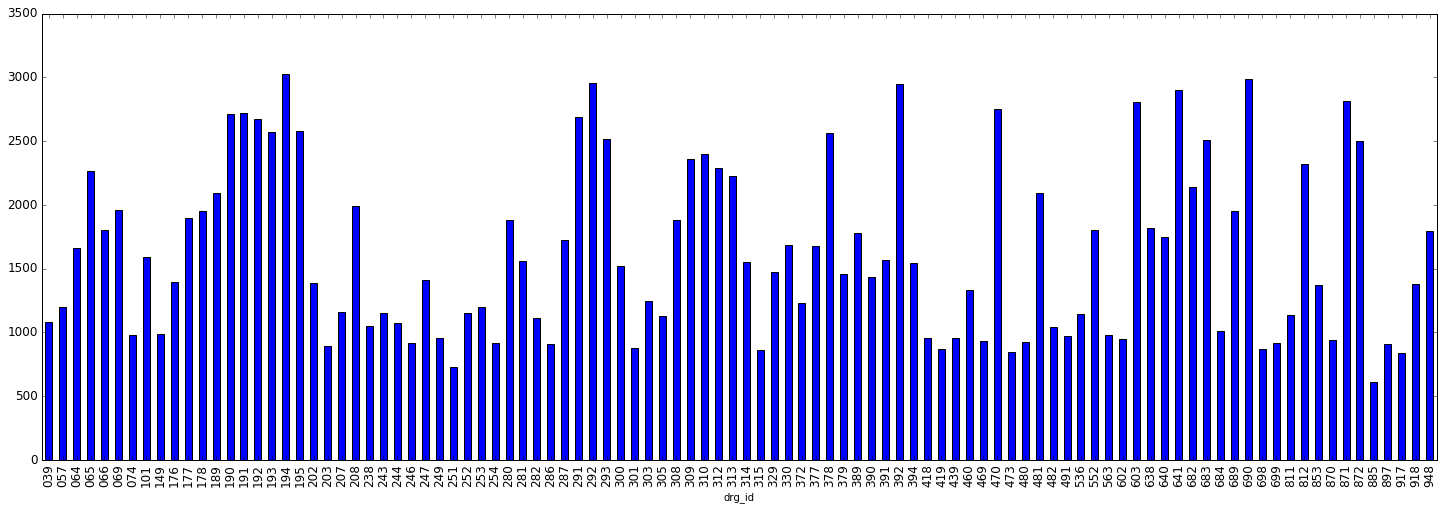

In [6]:
#Total number for each procedure
dfg.sum(1).plot(ylim=0,kind='bar',figsize=(25,8),fontsize=12)

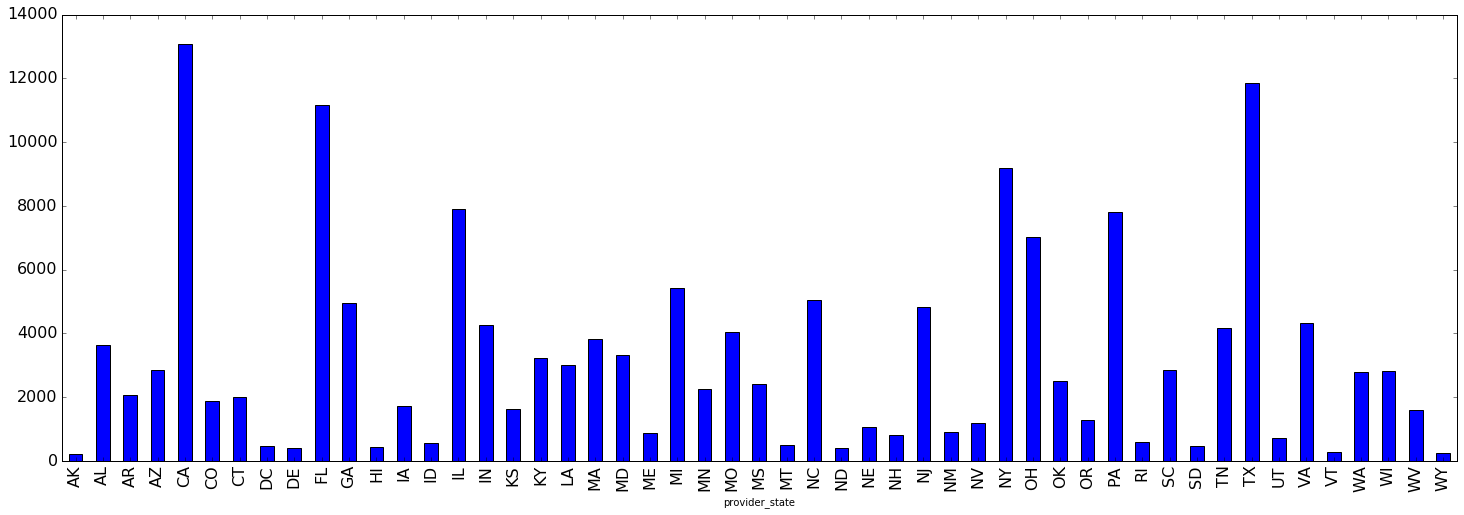

In [7]:
#Total number of procedures in each state
dfg.sum().plot(ylim=0,kind='bar',figsize=(25,8),fontsize=16)

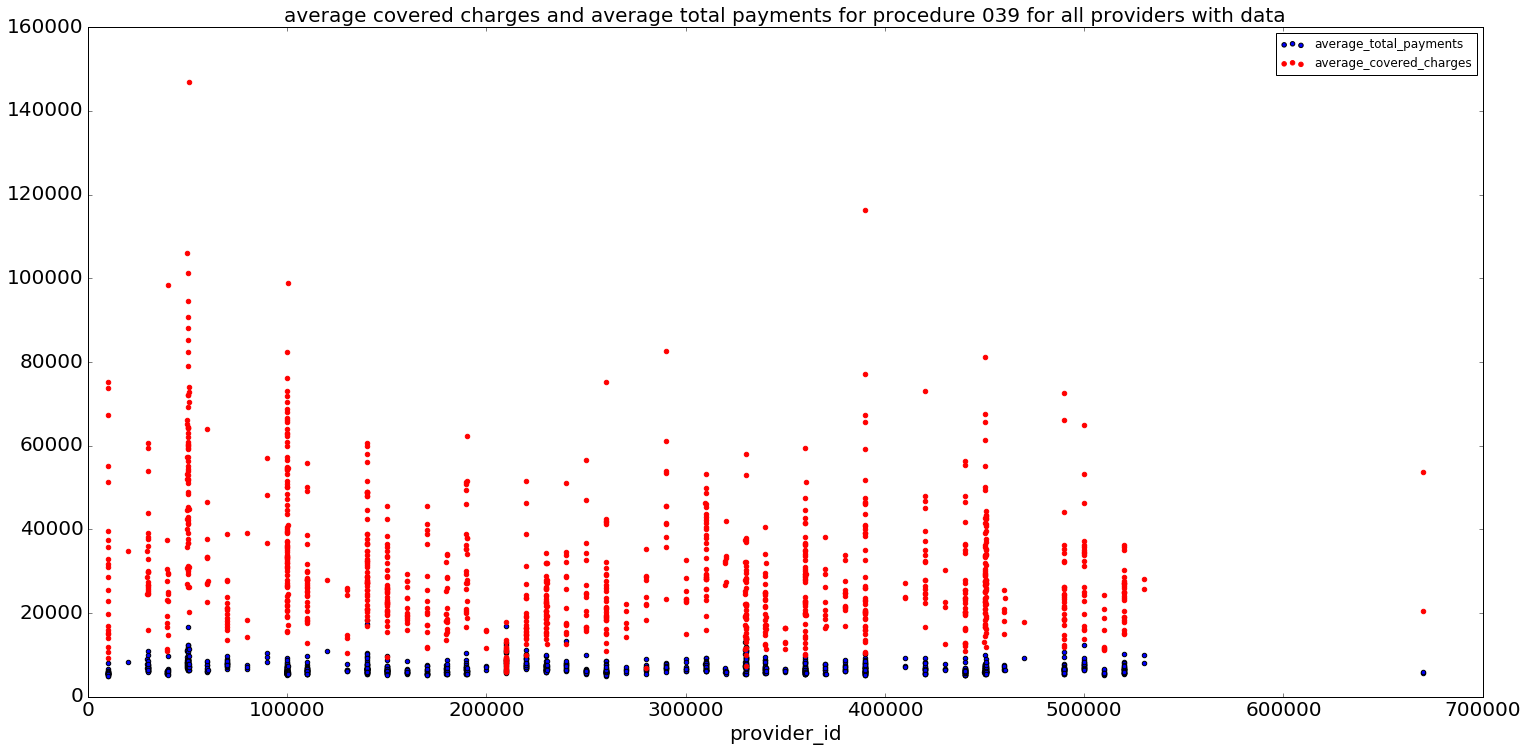

In [8]:
# Plot of average covered charges and average total payments for procedure 039 for all providers (provider id's
# are clustered by state)
dfp=df[df.drg_id == '039']
pid=np.array(dfp.provider_id.astype(int))
plt.figure(figsize = (25,12))
plt.scatter(pid,dfp.average_total_payments)
plt.scatter(pid,dfp.average_covered_charges,color='r')
plt.xticks(fontsize=20)
plt.xlim([0,700000])
plt.xlabel('provider_id',fontsize=20)
plt.yticks(fontsize=20)
plt.ylim([0,160000])

plt.title('average covered charges and average total payments for procedure 039 for all providers with data',fontsize=20)
plt.legend();


In [9]:
len(df[df.average_total_payments/df.average_covered_charges > 1])

583

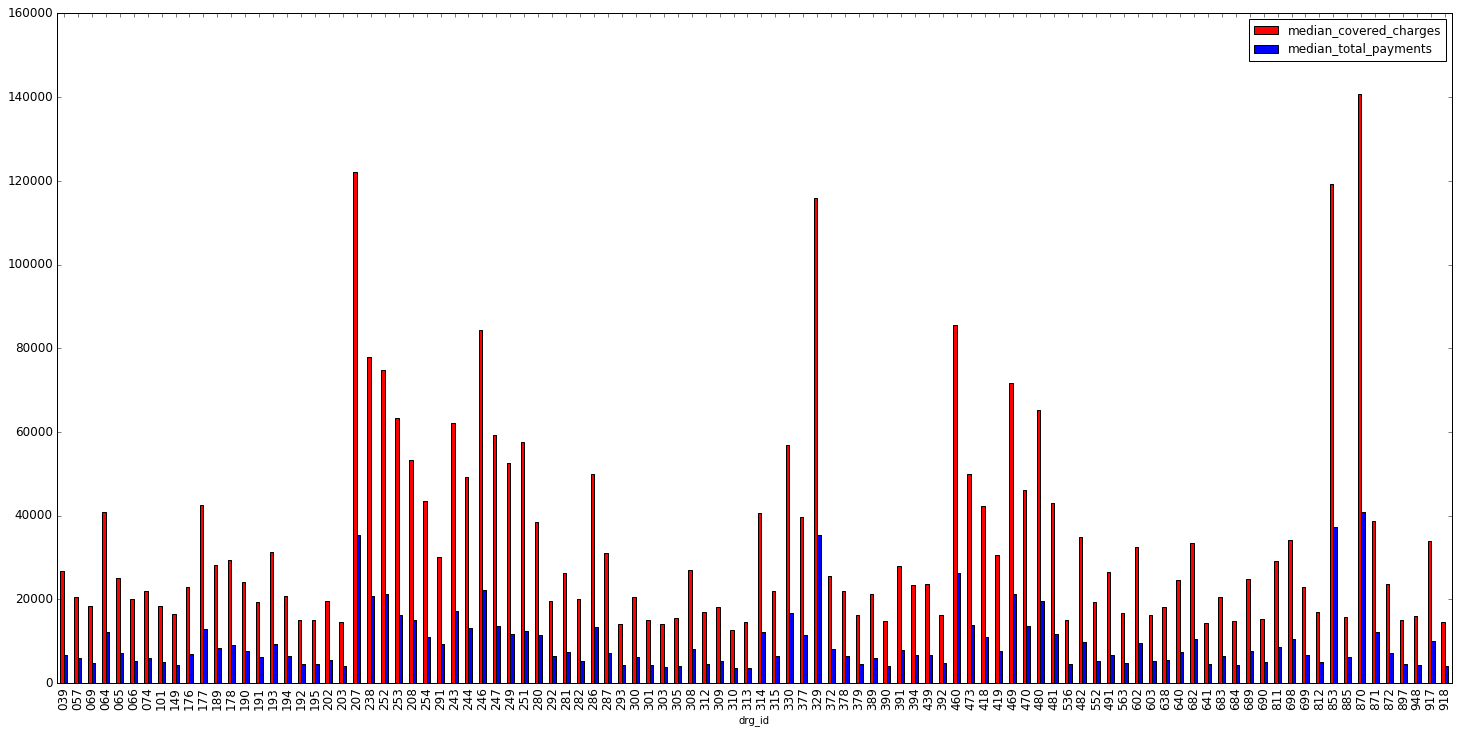

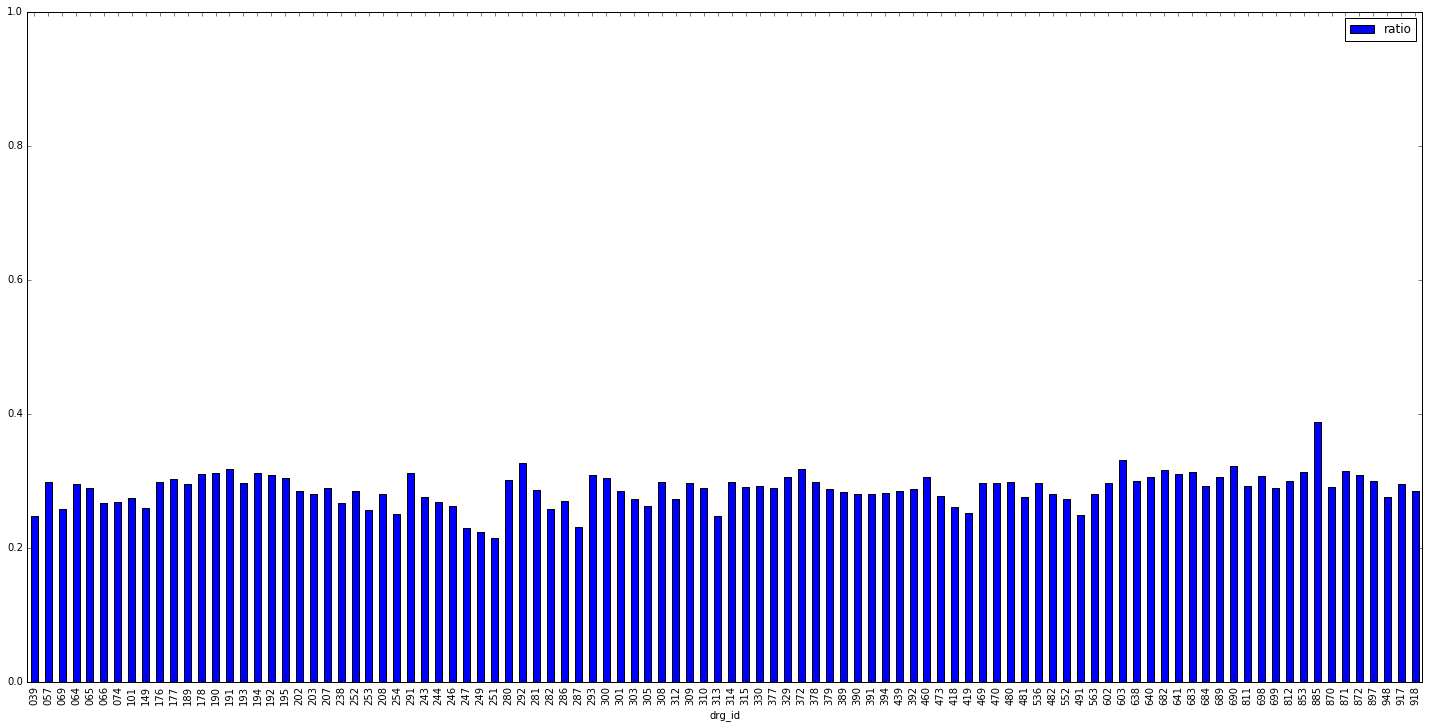

In [10]:
# Plot of median covered charges and median total payments nationally for each procedure, and their ratio.
proc = df.drg_id.unique()
medproc = pd.DataFrame()

for i in proc:
    dfp=df[df.drg_id == i].reset_index(drop=True)
    medpay=dfp.average_total_payments.median()
    medchg=dfp.average_covered_charges.median()
    di = {'drg_id' : i, 'median_total_payments' :medpay, 'median_covered_charges' : medchg, 'ratio' : medpay/medchg}
    medproc = medproc.append(di,ignore_index=True)

medproc[['drg_id','median_covered_charges','median_total_payments']].set_index('drg_id').plot(kind='bar',fontsize=12,figsize = (25,12),color=('r','b'))

medproc.set_index('drg_id').plot(y='ratio',kind='bar',figsize = (25,12),ylim=[0,1]);

In [11]:
# The national median cost for each procedure
medproc.head()

,drg_id,median_covered_charges,median_total_payments,ratio
0,039,26651.000,6582.890,0.247003
1,057,20453.050,6093.750,0.297938
2,069,18342.265,4740.235,0.258432
3,064,40953.590,12084.700,0.295083
4,065,25151.470,7280.050,0.289448


In [12]:
prov = df.provider_id.unique()

Number of procedures:  92
Number of procedures:  49


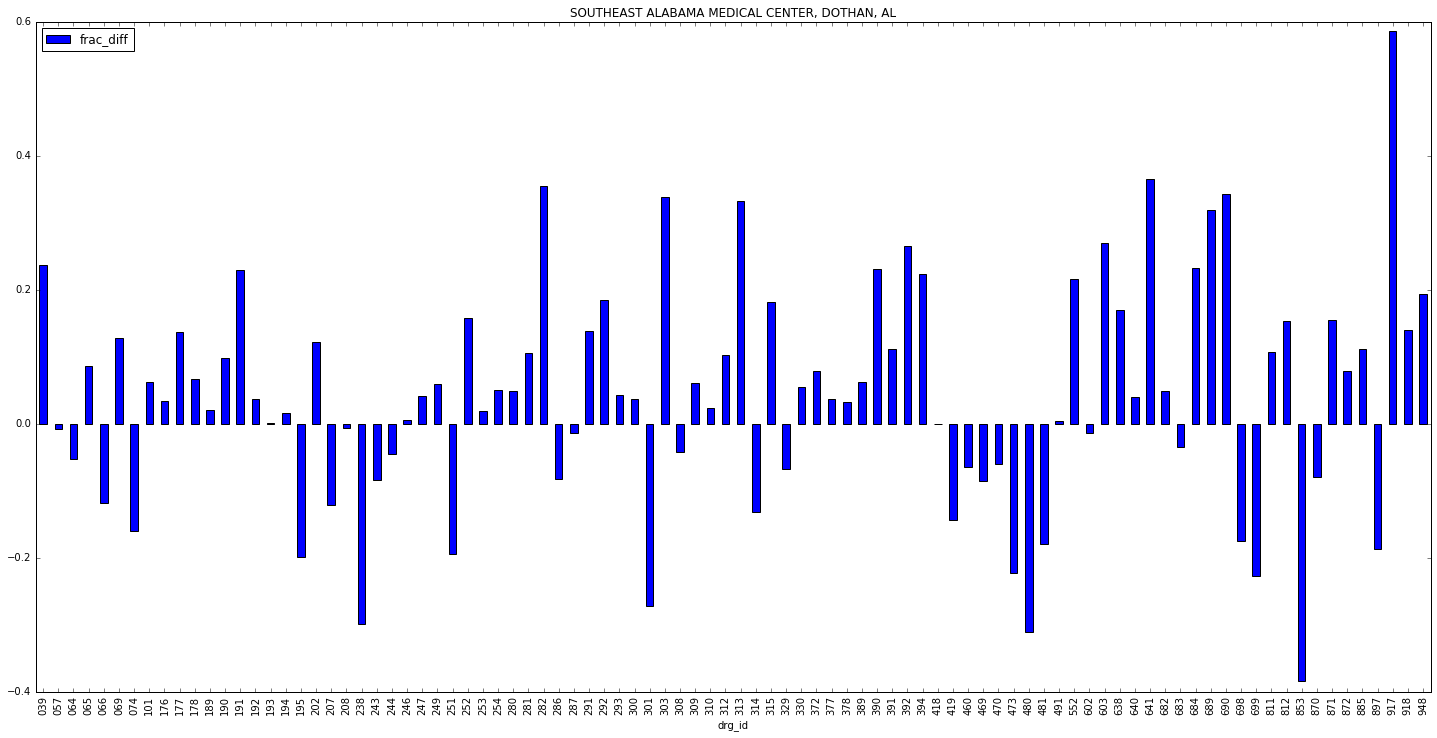

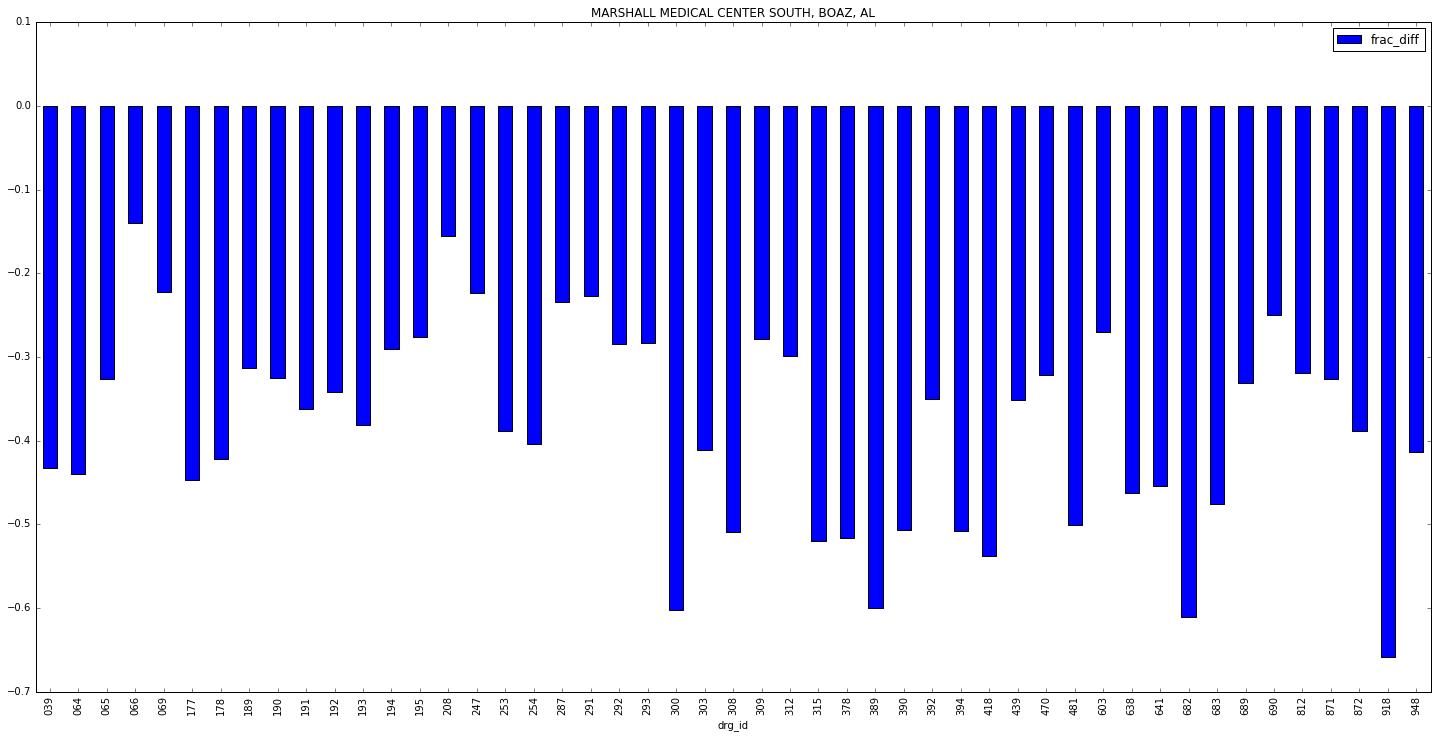

In [13]:
# Fractional difference of total cost compared to national median for two providers 
# by procedure

dfprov = df[df.provider_id == prov[0]]
provider=dfprov.provider_name.iloc[0]+', '+dfprov.provider_city.iloc[0]+', '+dfprov.provider_state.iloc[0]
print('Number of procedures: ',len(dfprov))
dfprovnew = dfprov.merge(medproc, on = 'drg_id')
diff = (dfprovnew.average_covered_charges)/(dfprovnew.median_covered_charges)-1
df_frac=pd.DataFrame({'drg_id':dfprovnew.drg_id,'frac_diff':diff}).set_index('drg_id')
df_frac.plot(kind='bar',figsize=(25,12),title=provider)

dfprov = df[df.provider_id == prov[1]]
provider=dfprov.provider_name.iloc[0]+', '+dfprov.provider_city.iloc[0]+', '+dfprov.provider_state.iloc[0]
print('Number of procedures: ',len(dfprov))
dfprovnew = dfprov.merge(medproc, on = 'drg_id')
diff = (dfprovnew.average_covered_charges)/(dfprovnew.median_covered_charges)-1
df_frac=pd.DataFrame({'drg_id':dfprovnew.drg_id,'frac_diff':diff}).set_index('drg_id')
df_frac.plot(kind='bar',figsize=(25,12),title=provider);

In [14]:
# Determine the fractional difference in total cost from the national median for each provider averaged
# over all procedures
fracmn = pd.DataFrame()
for i in prov:
    dfprov = df[df.provider_id == i]
    state = dfprov.provider_state.iloc[0]
    dfprovnew = dfprov.merge(medproc, on = 'drg_id')
    diff = (dfprovnew.average_covered_charges)/(dfprovnew.median_covered_charges)-1
    fracmn = fracmn.append({'provider_id':i,'provider_state':state, 'mean_fractional_diff':diff.mean()},ignore_index=True)

fracmn.head()

,mean_fractional_diff,provider_id,provider_state
0,0.045061,10001,AL
1,-0.381475,10005,AL
2,0.063646,10006,AL
3,-0.136274,10011,AL
4,0.305562,10016,AL


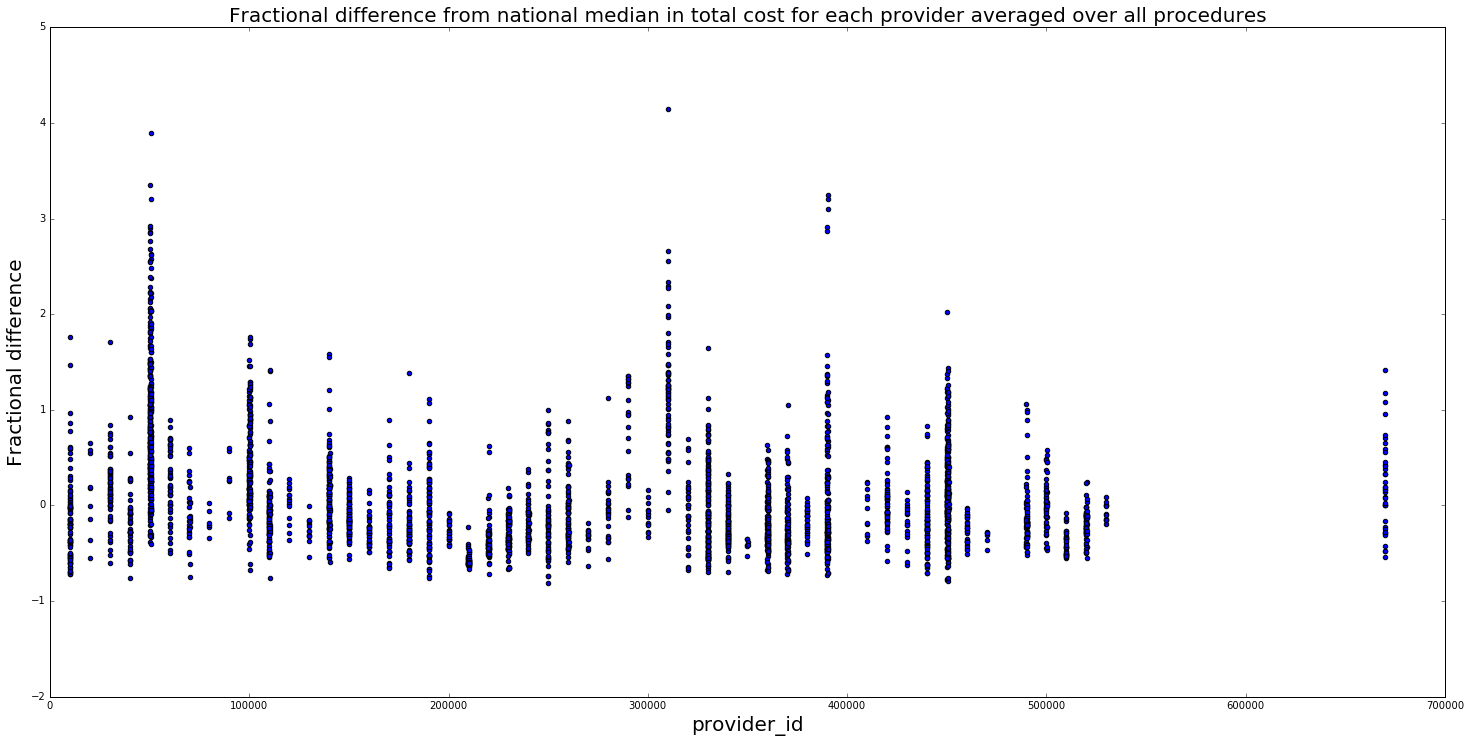

In [15]:
pid=np.array(fracmn.provider_id.astype(int))
plt.figure(figsize = (25,12))
plt.scatter(pid,fracmn.mean_fractional_diff)
plt.xlim([0,700000])
plt.xlabel('provider_id',fontsize=20)
plt.ylabel('Fractional difference',fontsize=20)
plt.title('Fractional difference from national median in total cost for each provider averaged over all procedures',fontsize=20);

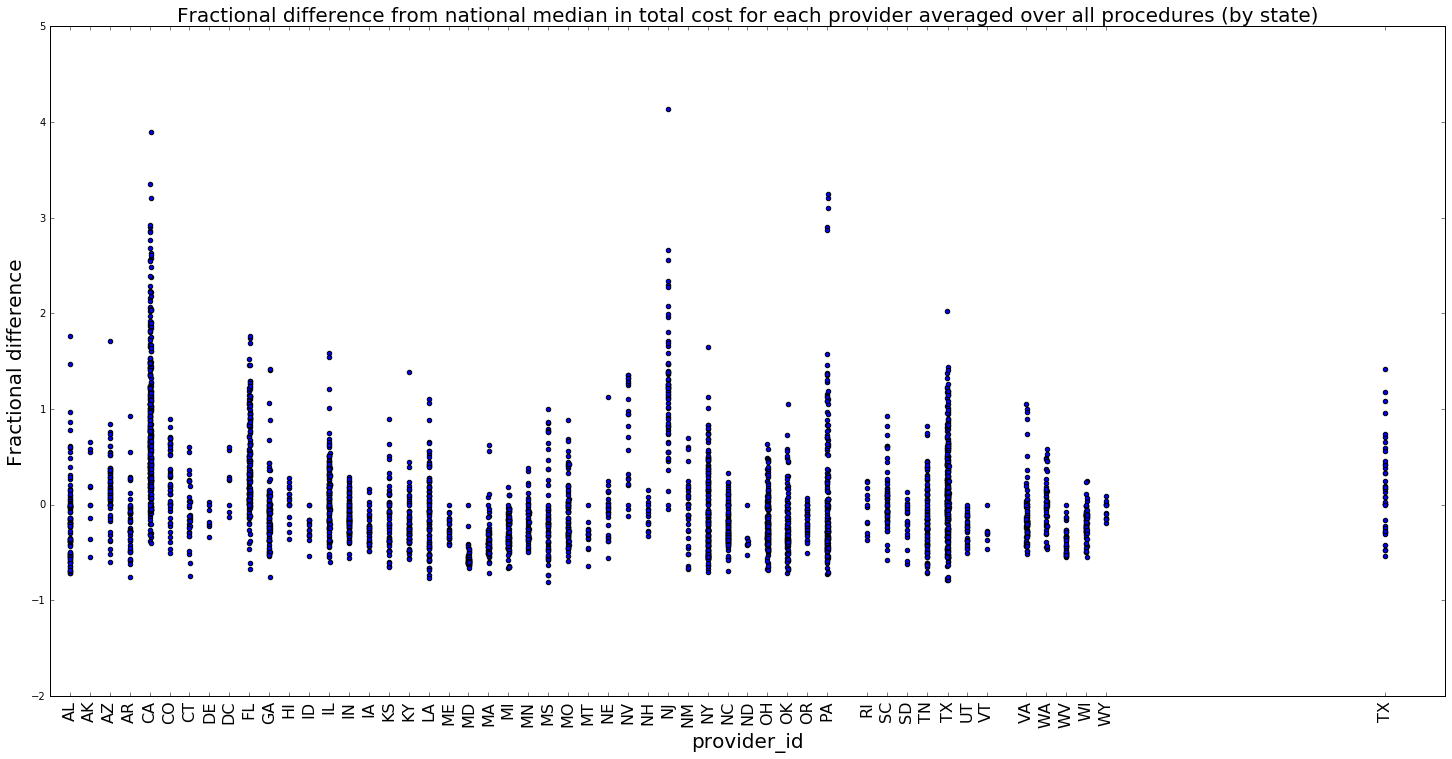

In [16]:
# Since provider ID is grouped by state I labeled each cluster by it's state.

stateid =fracmn[['provider_id','provider_state']].drop_duplicates(subset='provider_state')
stateid = stateid.append({'provider_id':'670000','provider_state':'TX'},ignore_index=True)

plt.figure(figsize = (25,12))
plt.scatter(pid,fracmn.mean_fractional_diff)
plt.xlim([0,700000])
plt.xlabel('provider_id',fontsize=20)
plt.ylabel('Fractional difference',fontsize=20)
plt.title('Fractional difference from national median in total cost for each provider averaged over all procedures (by state)',fontsize=20)
plt.scatter(stateid.provider_id.astype(int),list([0.0]*len(stateid)))
plt.xticks(stateid.provider_id.astype(int), stateid.provider_state, rotation='vertical',fontsize=16);